In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load dataset
iris = load_iris()
X = iris.data  # features
y_true = iris.target  # true labels (not used for KMeans, but for reference)

# Range of k values to test
k_values = range(2, 10)
inertias = []
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)  # SSE
    sil_scores.append(silhouette_score(X, kmeans.labels_))

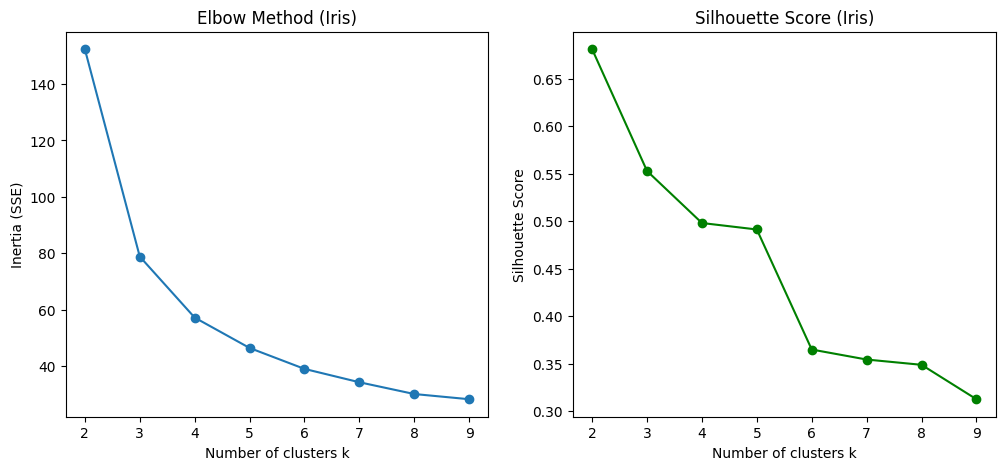

In [2]:
# ---- Plot Evaluation ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Elbow Method
ax1.plot(k_values, inertias, marker='o')
ax1.set_title("Elbow Method (Iris)")
ax1.set_xlabel("Number of clusters k")
ax1.set_ylabel("Inertia (SSE)")

# Silhouette Scores
ax2.plot(k_values, sil_scores, marker='o', color='green')
ax2.set_title("Silhouette Score (Iris)")
ax2.set_xlabel("Number of clusters k")
ax2.set_ylabel("Silhouette Score")

plt.show()

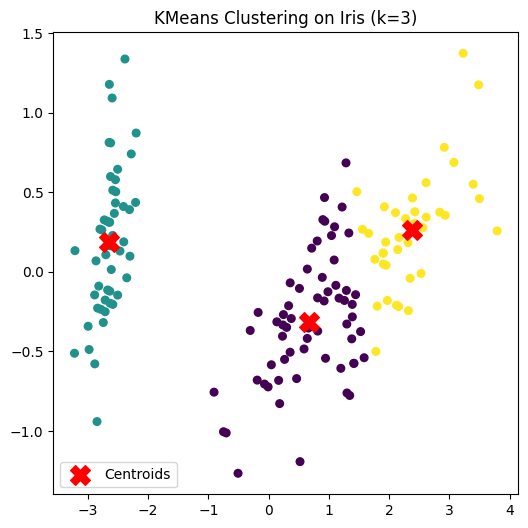

In [3]:
# ---- Cluster Visualization with PCA (2D) ----
best_k = 3  # Iris has 3 classes, let's test that
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], 
            pca.transform(kmeans.cluster_centers_)[:,1],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f"KMeans Clustering on Iris (k={best_k})")
plt.legend()
plt.show()